In [1]:
"""
Predict albedo and shading layer of an input image.
"""

import os
import sys
sys.path.append('./util')
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

__author__ = "Udo Dehm"
__copyright__ = "Copyright 2017"
__credits__ = ["Udo Dehm"]
__license__ = ""
__version__ = "0.1"
__maintainer__ = "Udo Dehm"
__email__ = "udo.dehm@mailbox.org"
__status__ = "Development"

In [2]:
def import_data(data_directory):
    dfs_train = {}
    dfs_valid = {}
    for file in os.listdir(data_directory):
        df_name = 'df_' + file[10:-4].replace('loss_', '').replace('_1', '').replace('invariant', 'inv')
        if 'valid' in file:
            df_name = df_name.replace('valid_', '')
            dfs_valid[df_name] = pd.read_csv(filepath_or_buffer=data_directory + file)
            dfs_valid[df_name].columns = dfs_valid[df_name].columns.str.replace(" ", "_").str.lower()
            dfs_valid[df_name]['wall_time'] = pd.to_datetime(dfs_valid[df_name]['wall_time'],unit='s')
        else:
            df_name = df_name.replace('_loss', '')
            if '_lambda' in df_name:
                df_name = df_name[:df_name.find('_lambda')]
            dfs_train[df_name] = pd.read_csv(filepath_or_buffer=data_directory + file)
            dfs_train[df_name].columns = dfs_train[df_name].columns.str.replace(" ", "_").str.lower()
            dfs_train[df_name]['wall_time'] = pd.to_datetime(dfs_train[df_name]['wall_time'],unit='s')
    return dfs_train, dfs_valid


def plot_all_loss_pairs(dfs_train, dfs_valid, logy=False, ylim_scale=5):
    for key in dfs_train:
        fig = plt.figure
        ax = dfs_train[key].plot(x='step', y='value', figsize=(12,7), 
                                 fontsize=14, legend=True, style='-o',
                                 title=key[3:], logy=logy)
        dfs_valid[key].plot(x='step', y='value', style='-o', ax=ax)
        ax.set_xlabel('step')
        ax.set_ylabel('loss')
        plt.ylim(0,ylim_scale*dfs_train[key]['value'].max())
        ax.legend(["training set", "validation set"], prop={'size': 14})
        # plt.savefig('foo.png', bbox_inches='tight')


def get_all_loss_model_data(data_dir, exclude_sub_dirs=[]):
    dfs_train = {}
    dfs_valid = {}
    dirs = [x for x in sorted(os.listdir(data_dir)) if x not in exclude_sub_dirs]
    for direc in dirs:
        dict_train, dict_valid = import_data(data_directory=data_dir + '/' + direc + '/')
        for key in dict_train:
            if key not in dfs_train:
                dfs_train[key] = pd.DataFrame()
                dfs_valid[key] = pd.DataFrame()
            dfs_train[key] = dfs_train[key].append(dict_train[key], ignore_index=True)
            dfs_valid[key] = dfs_valid[key].append(dict_valid[key], ignore_index=True)
    return dfs_train, dfs_valid

In [3]:
logs_data_path = '/home/udo/image_decomposition/logs/logs_data/'

# Sintel:

In [4]:
logs_data_path_sintel = logs_data_path + 'sintel/'

## Resnet-50 deconv decoder (1 scale):

In [5]:
lst = get_all_loss_model_data(data_dir=logs_data_path_sintel + 'slim_resnet_v1_50_deconv_decoder')
dfs_train_resnet_v1_50_deconv_decoder, dfs_valid_resnet_v1_50_deconv_decoder = lst

/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:830: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)


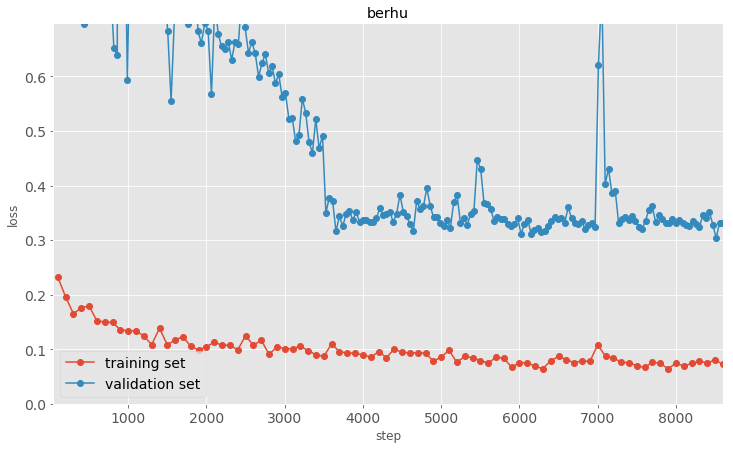

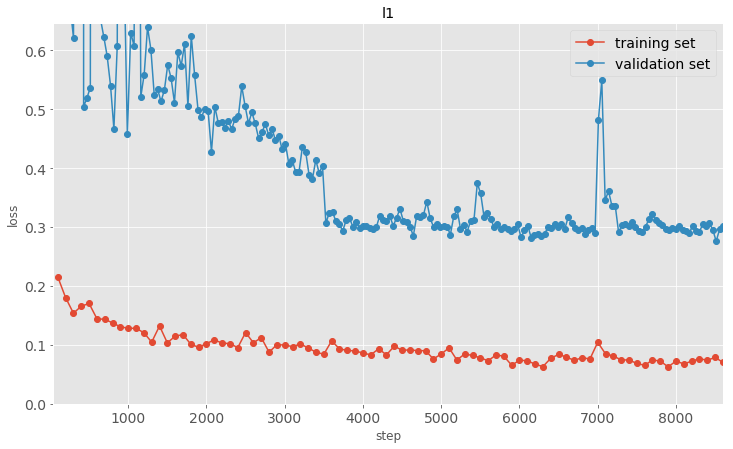

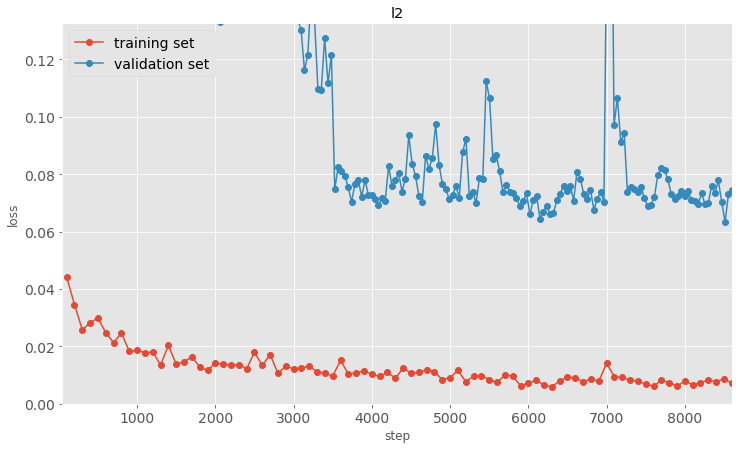

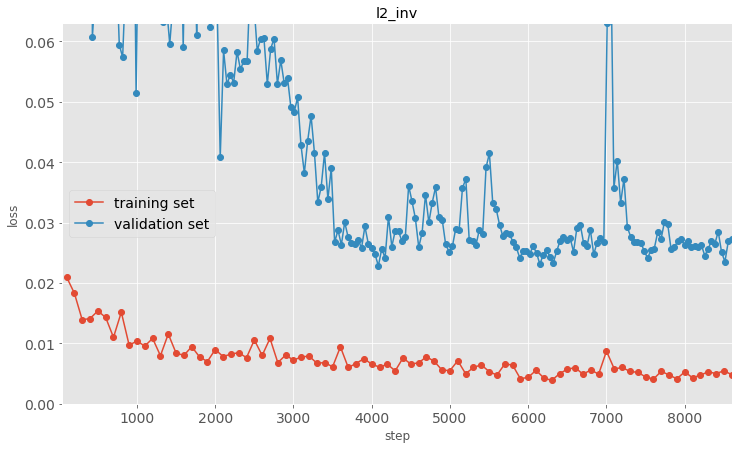

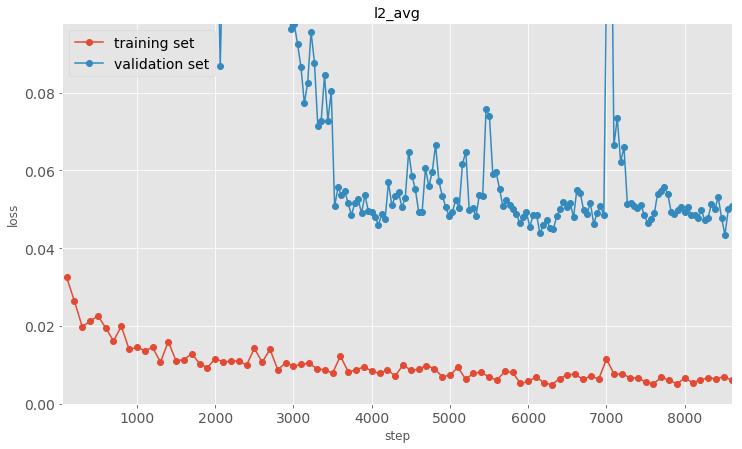

In [6]:
plot_all_loss_pairs(dfs_train=dfs_train_resnet_v1_50_deconv_decoder, 
                    dfs_valid=dfs_valid_resnet_v1_50_deconv_decoder, logy=False, ylim_scale=3)

## Resnet-50 narihira2015 (2 scale):

In [7]:
lst = get_all_loss_model_data(data_dir=logs_data_path_sintel + 'slim_resnet_v1_50_narihira2015')
dfs_train_resnet_v1_50_narihira2015, dfs_valid_resnet_v1_50_narihira2015 = lst

/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:830: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)


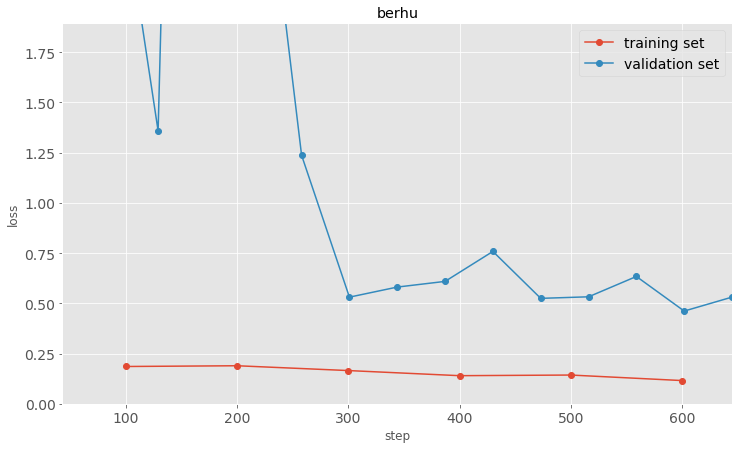

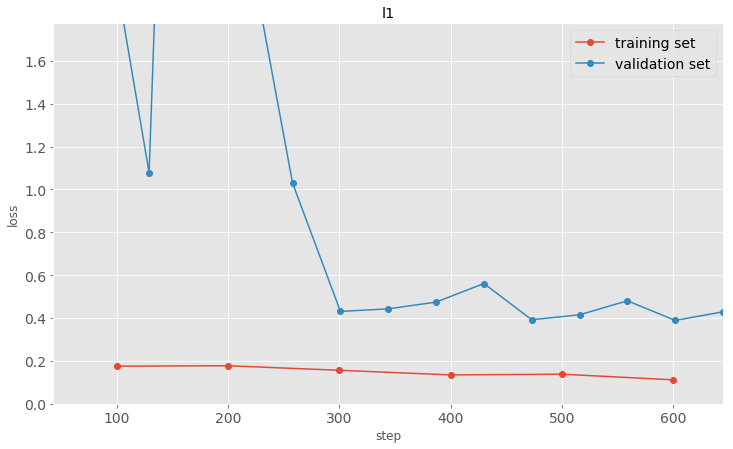

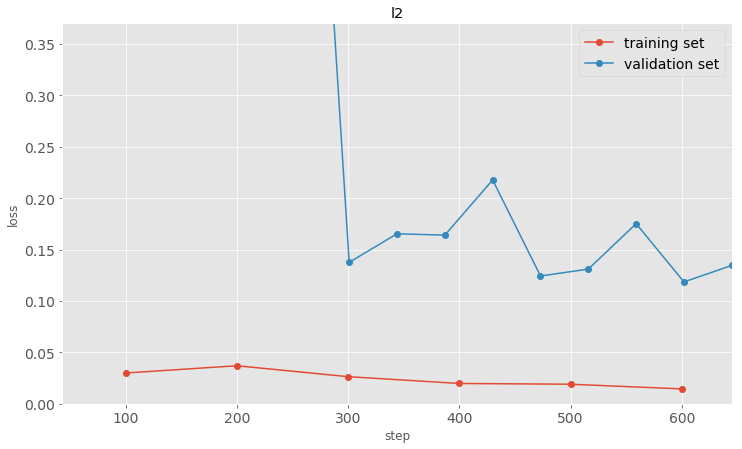

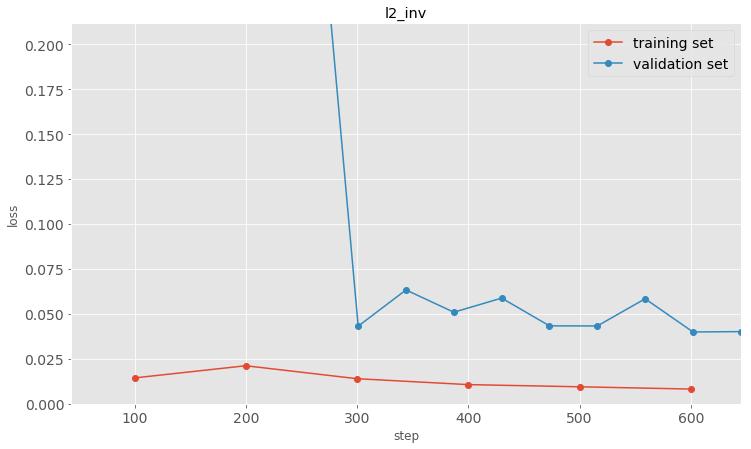

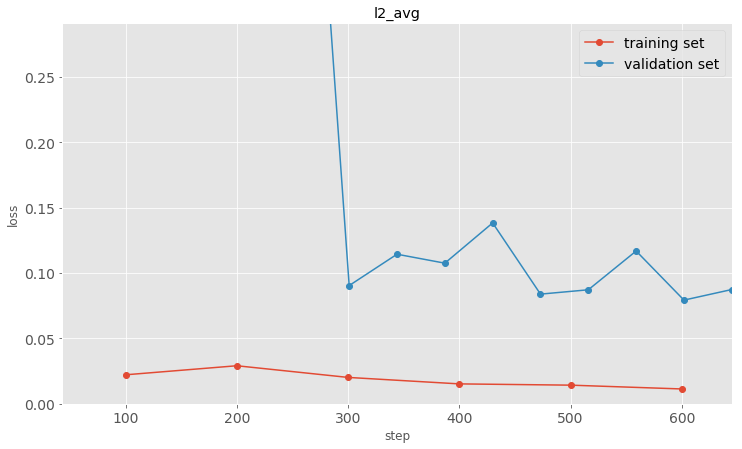

In [8]:
plot_all_loss_pairs(dfs_train=dfs_train_resnet_v1_50_narihira2015, 
                    dfs_valid=dfs_valid_resnet_v1_50_narihira2015, 
                    logy=False, ylim_scale=10)

## Resnet-50 deconv decoder (1 scale, reduced parameters):

In [9]:
lst = get_all_loss_model_data(data_dir=logs_data_path_sintel + 'slim_resnet_v1_50_deconv_decoder_reduced')
dfs_train_resnet_v1_50_deconv_decoder_reduced, dfs_valid_resnet_v1_50_deconv_decoder_reduced = lst

/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:830: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)


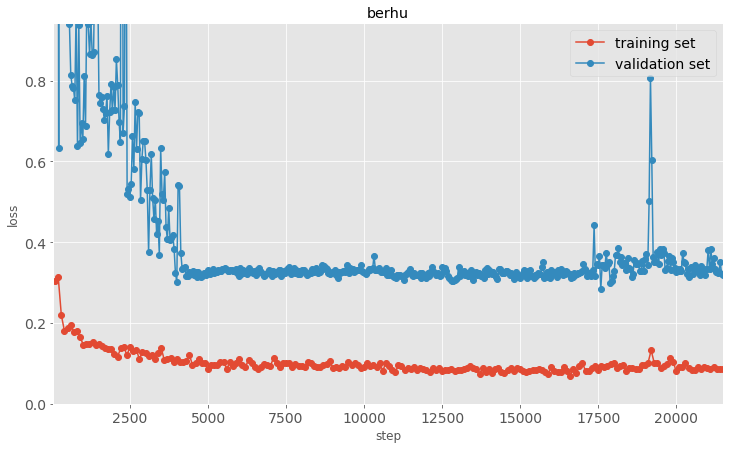

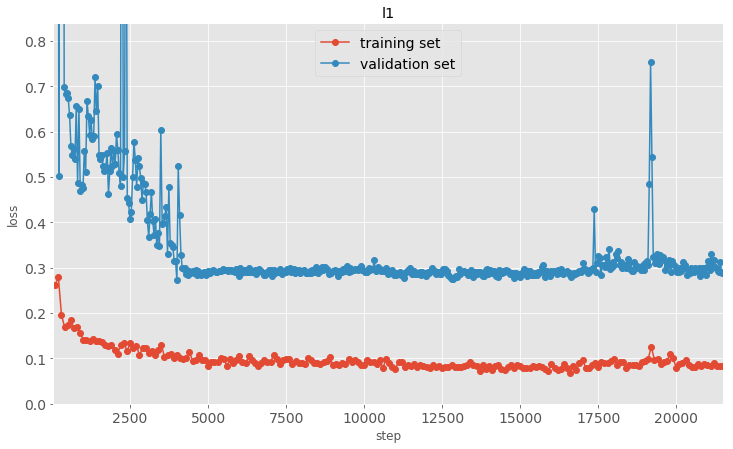

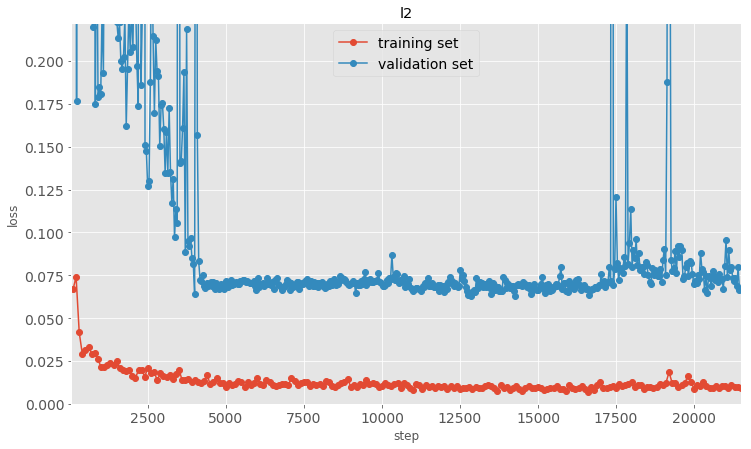

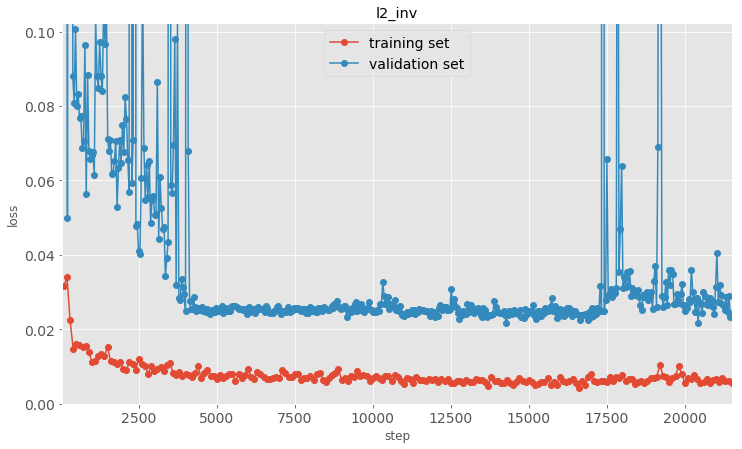

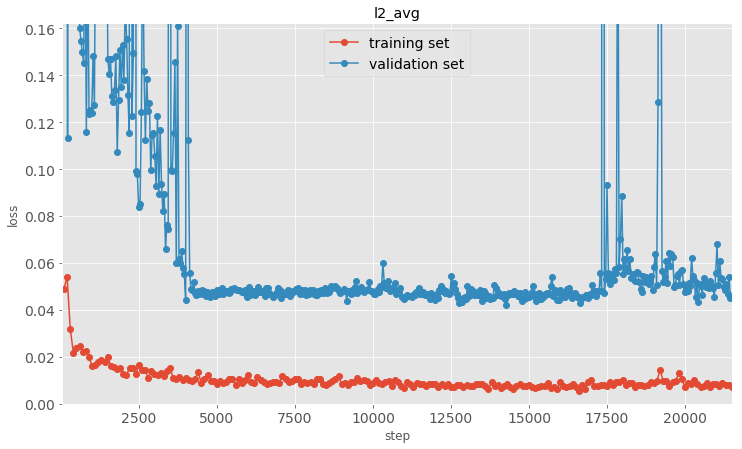

In [10]:
plot_all_loss_pairs(dfs_train=dfs_train_resnet_v1_50_deconv_decoder_reduced, 
                    dfs_valid=dfs_valid_resnet_v1_50_deconv_decoder_reduced, logy=False, ylim_scale=3)

## Resnet-50 narihira2015 (2 scale, reduced parameters):

In [11]:
lst = get_all_loss_model_data(data_dir=logs_data_path_sintel + 'slim_resnet_v1_50_narihira2015_reduced')
dfs_train_resnet_v1_50_narihira2015_reduced, dfs_valid_resnet_v1_50_narihira2015_reduced = lst

/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:830: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)


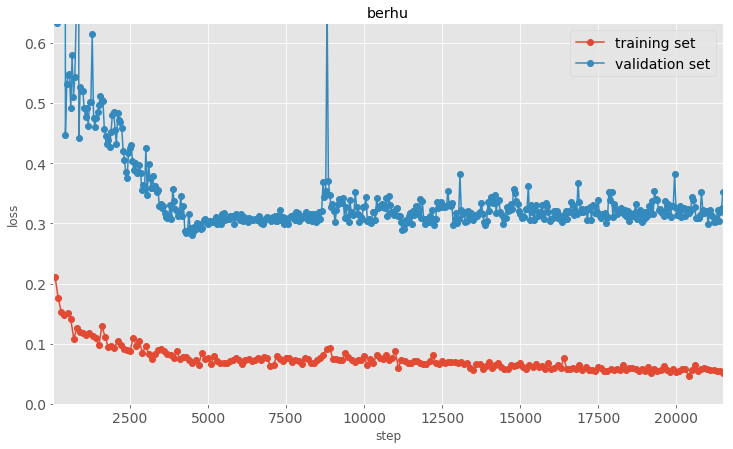

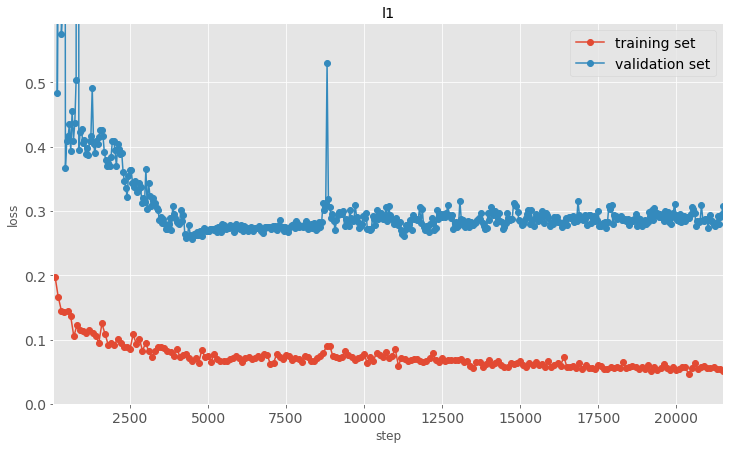

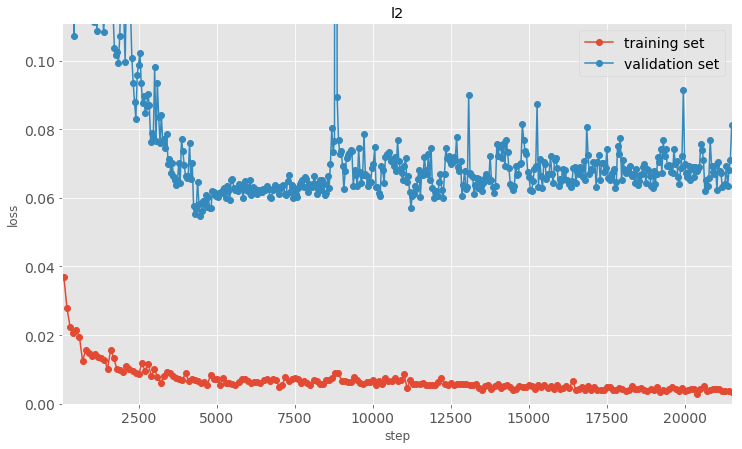

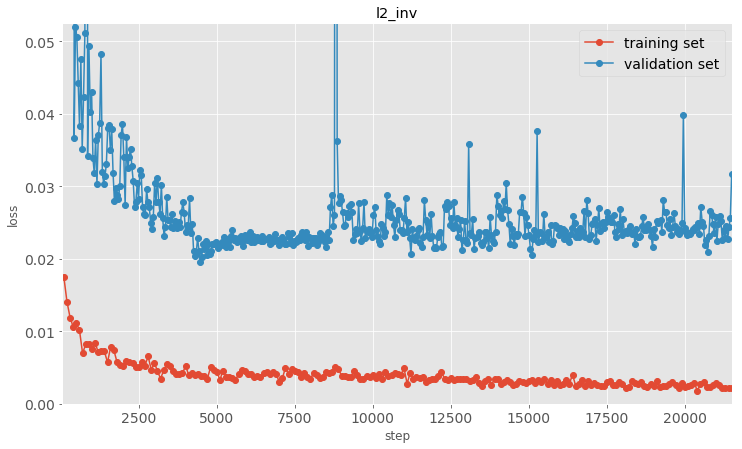

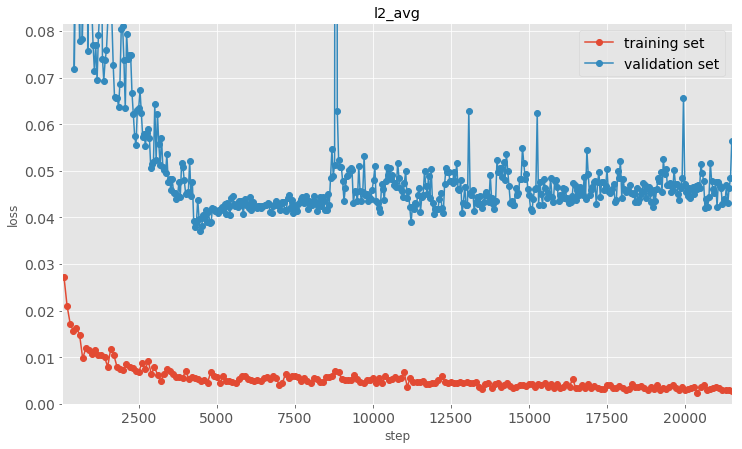

In [12]:
plot_all_loss_pairs(dfs_train=dfs_train_resnet_v1_50_narihira2015_reduced, 
                    dfs_valid=dfs_valid_resnet_v1_50_narihira2015_reduced, logy=False, ylim_scale=3)

## VGG-16 narihira2015 (2 scale, reduced parameters):

In [13]:
lst = get_all_loss_model_data(data_dir=logs_data_path_sintel + 'slim_vgg16_narihira2015_reduced_bn')
dfs_train_vgg16_narihira2015_reduced_bn, dfs_valid_vgg16_narihira2015_reduced_bn = lst

/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:830: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)


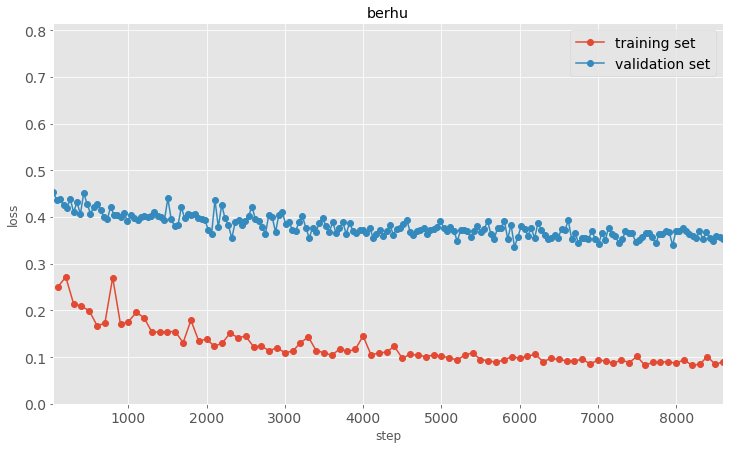

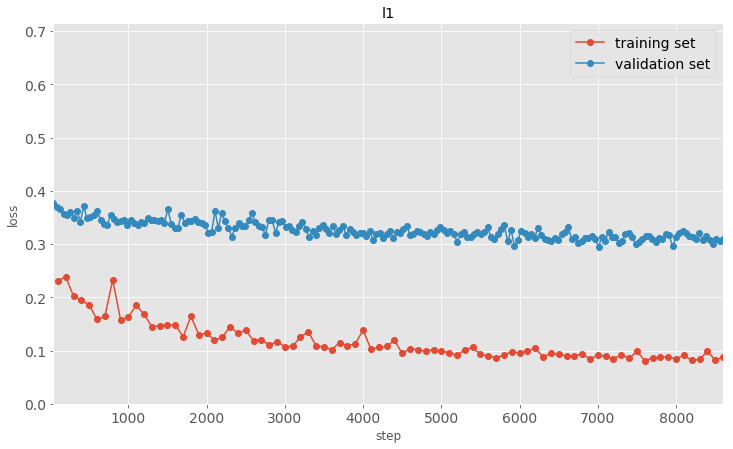

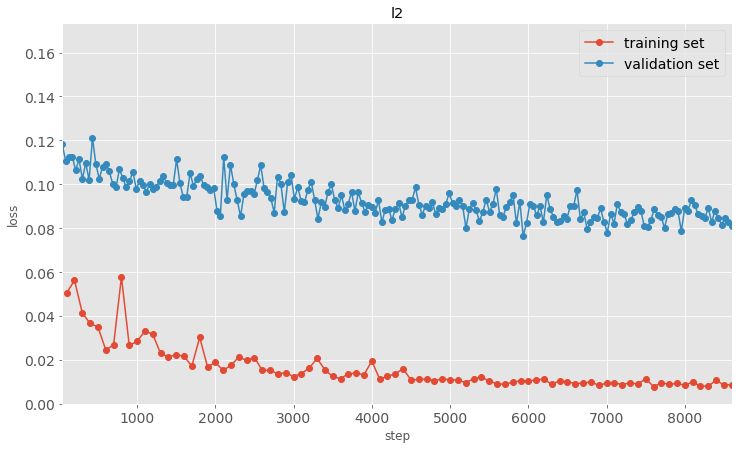

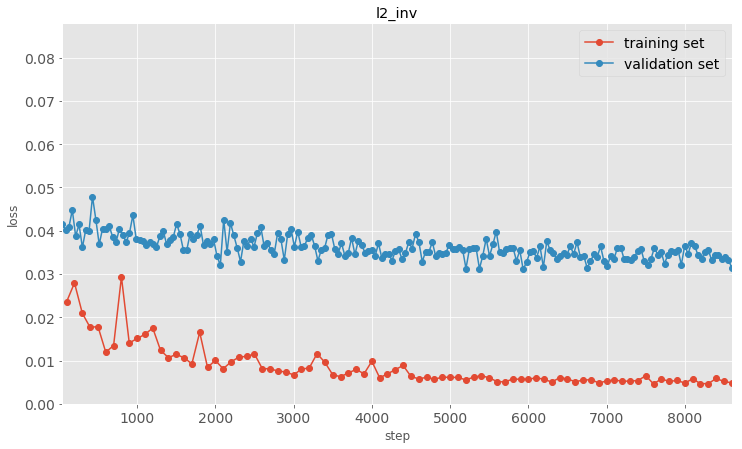

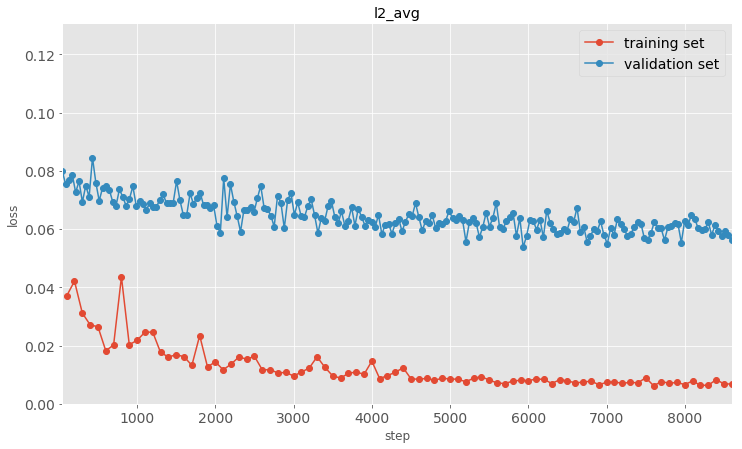

In [14]:
plot_all_loss_pairs(dfs_train=dfs_train_vgg16_narihira2015_reduced_bn, 
                    dfs_valid=dfs_valid_vgg16_narihira2015_reduced_bn, logy=False, ylim_scale=3)

## VGG-16 deconv decoder (1 scale, reduced parameters, bn):

In [15]:
lst = get_all_loss_model_data(data_dir=logs_data_path_sintel + 'slim_vgg16_deconv_decoder_reduced_bn')
dfs_train_vgg16_deconv_decoder_reduced_bn, dfs_valid_vgg16_deconv_decoder_reduced_bn = lst

/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:830: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)


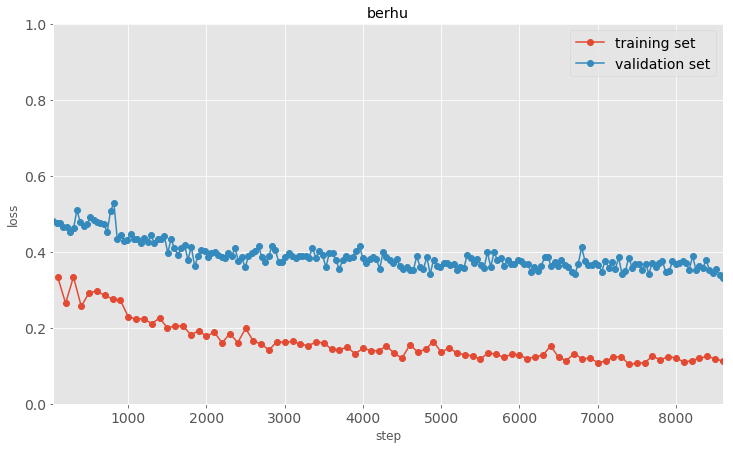

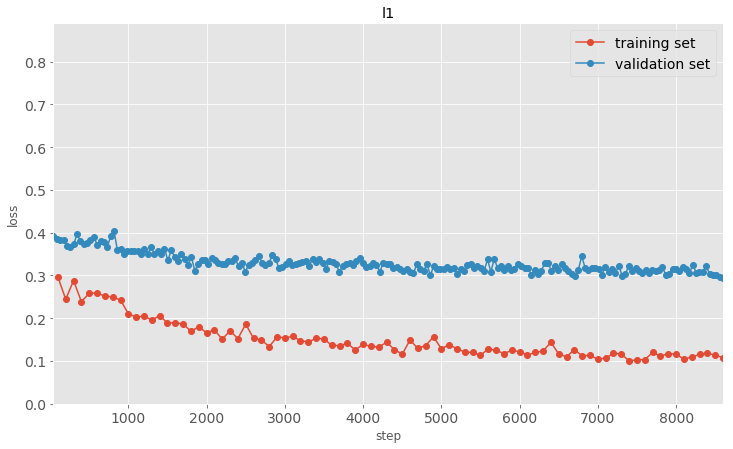

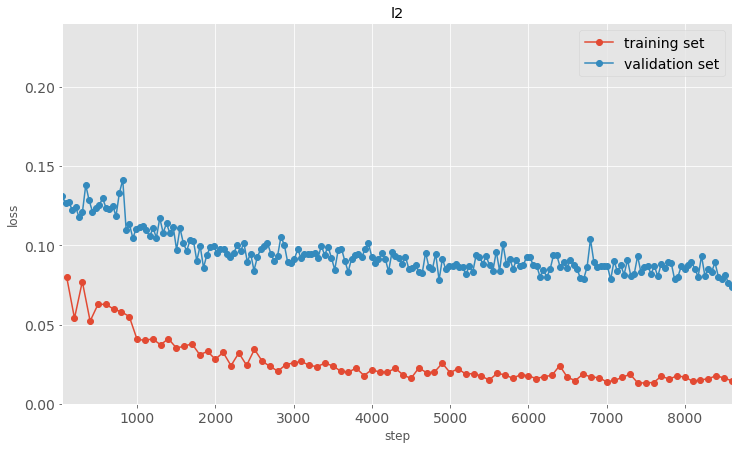

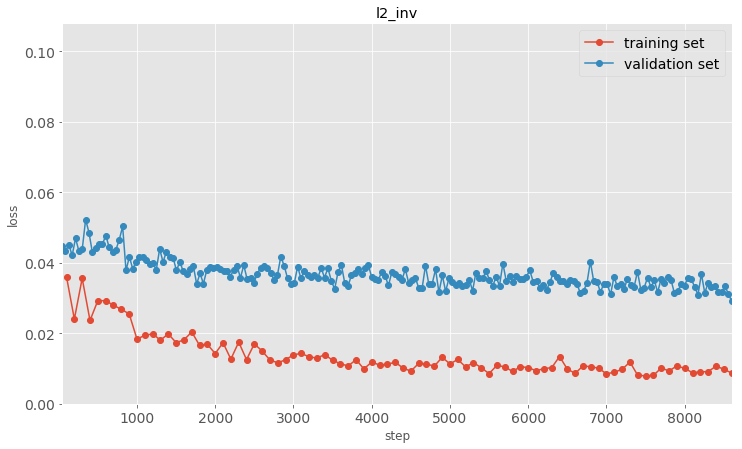

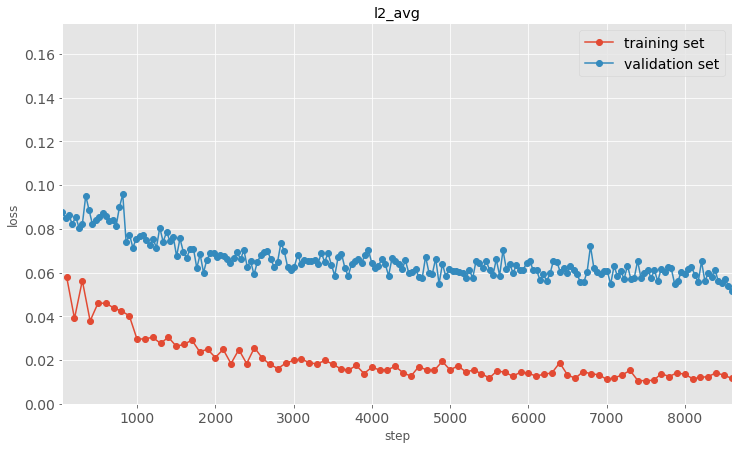

In [16]:
plot_all_loss_pairs(dfs_train=dfs_train_vgg16_deconv_decoder_reduced_bn, 
                    dfs_valid=dfs_valid_vgg16_deconv_decoder_reduced_bn, logy=False, ylim_scale=3)

## VGG-16 deconv_decoder (1 scale):

In [13]:
lst = get_all_loss_model_data(data_dir=logs_data_path_sintel + 'slim_vgg16_deconv_decoder')
dfs_train_vgg16_deconv_decoder, dfs_valid_vgg16_deconv_decoder = lst

/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:830: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)


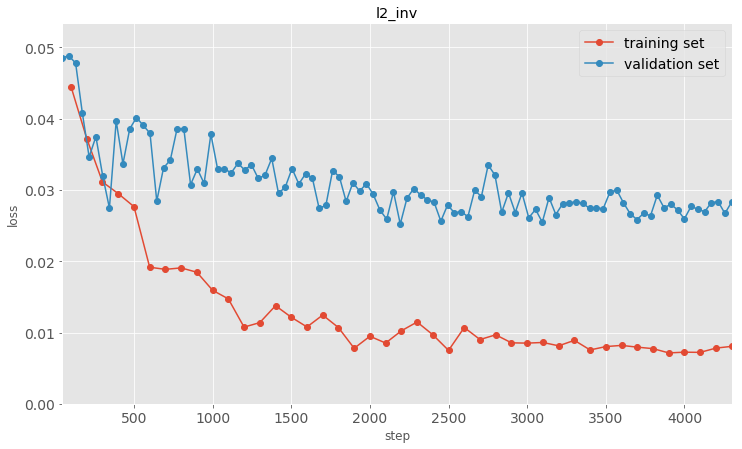

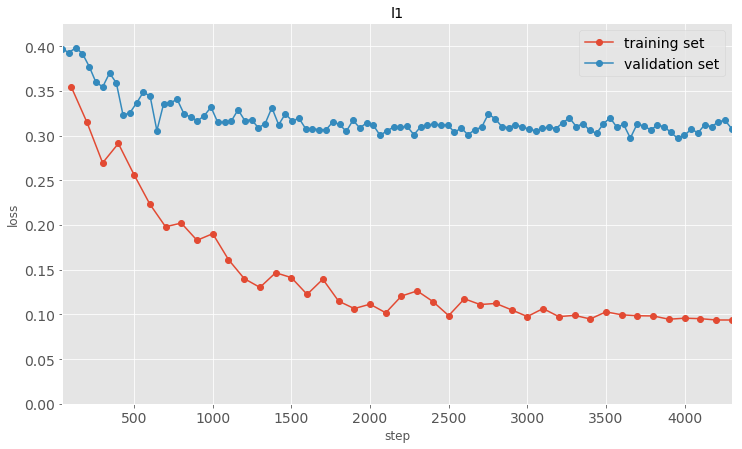

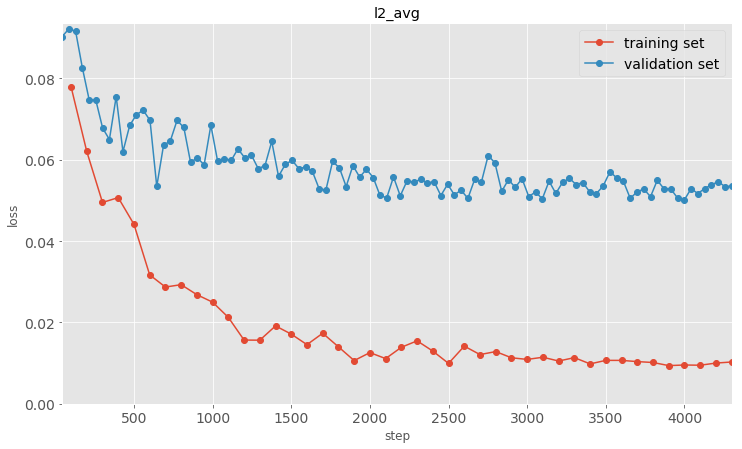

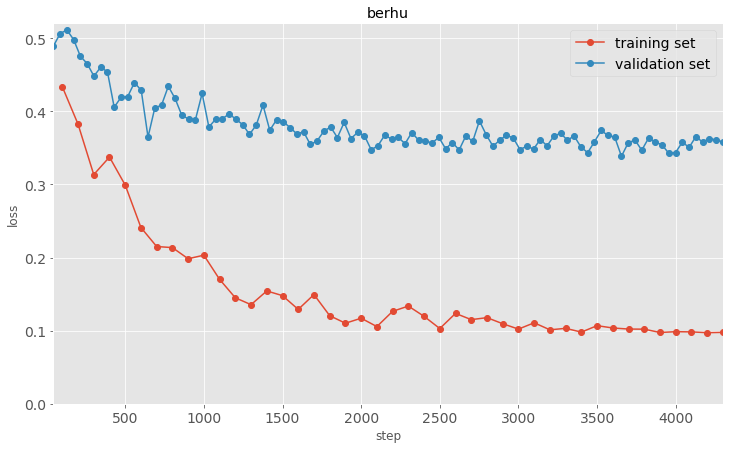

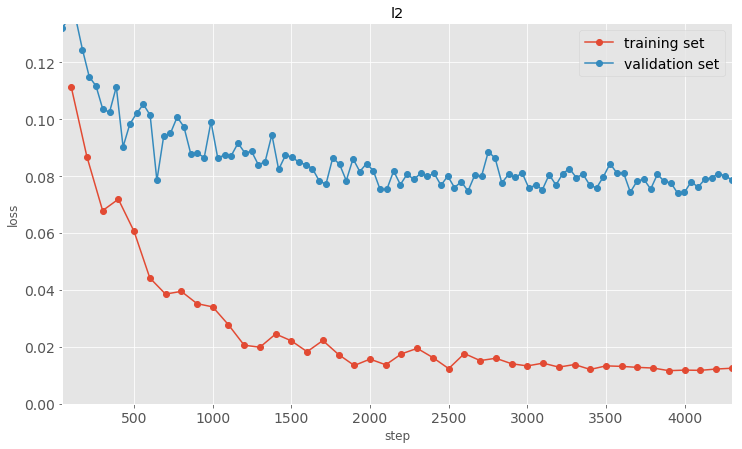

In [14]:
plot_all_loss_pairs(dfs_train=dfs_train_vgg16_deconv_decoder, 
                    dfs_valid=dfs_valid_vgg16_deconv_decoder, 
                    logy=False, ylim_scale=1.2)

## VGG-16 Narihira2015 (2 scale):

In [15]:
lst = get_all_loss_model_data(data_dir=logs_data_path_sintel + 'slim_vgg16_narihira2015')
dfs_train_vgg16_narihira2015, dfs_valid_vgg16_narihira2015 = lst

/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:830: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)
/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_base.py:3245: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


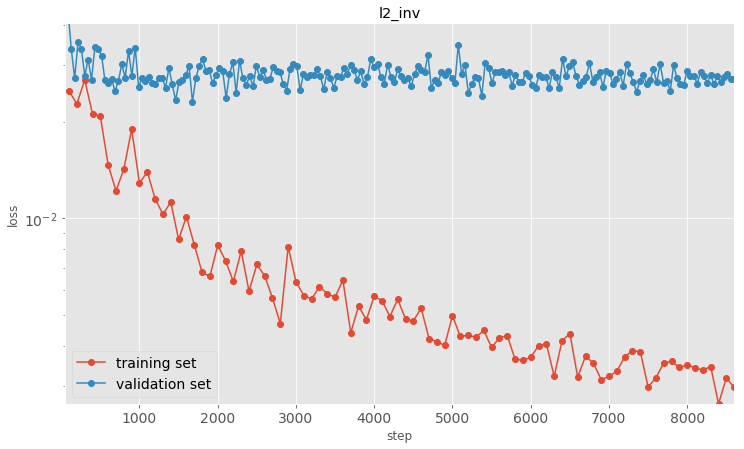

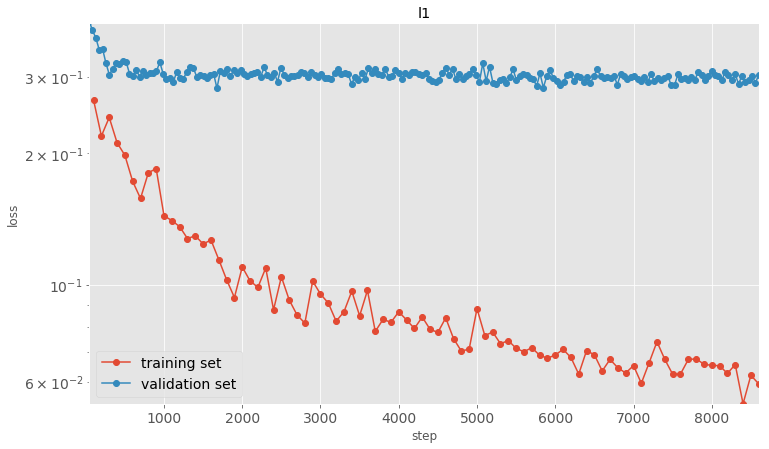

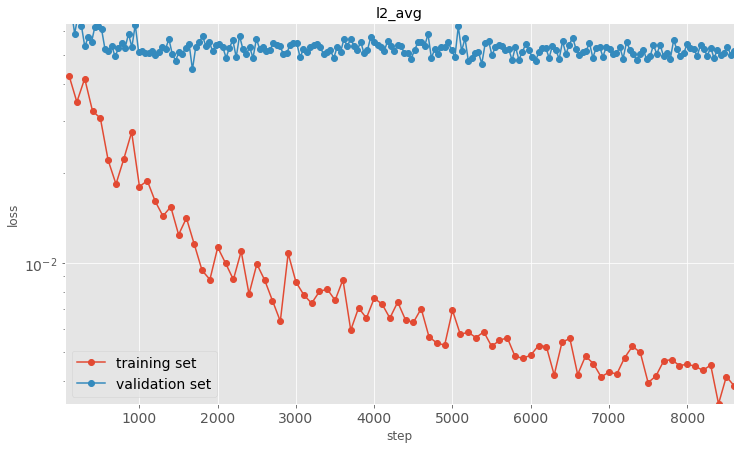

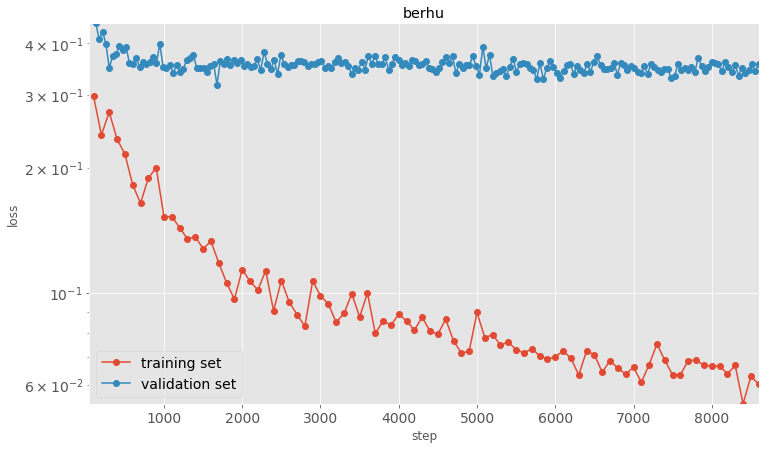

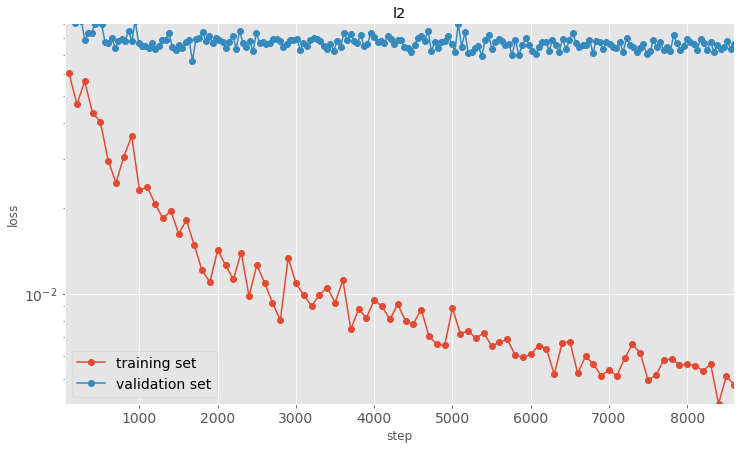

In [16]:
plot_all_loss_pairs(dfs_train=dfs_train_vgg16_narihira2015, 
                    dfs_valid=dfs_valid_vgg16_narihira2015, 
                    logy=True, ylim_scale=1.5)

# IIW

In [5]:
logs_data_path_iiw = logs_data_path + 'iiw/'

## Resnet-50 deconv decoder (1 scale):

### lambda = 0.5 (mhdl)

In [6]:
lst = get_all_loss_model_data(data_dir=logs_data_path_iiw + 'slim_resnet_v1_50_deconv_decoder/l1_05mhdl')
dfs_train_resnet_v1_50_deconv_decoder_iiw, dfs_valid_resnet_v1_50_deconv_decoder_iiw = lst

['1']


/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:830: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)
/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_base.py:3245: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


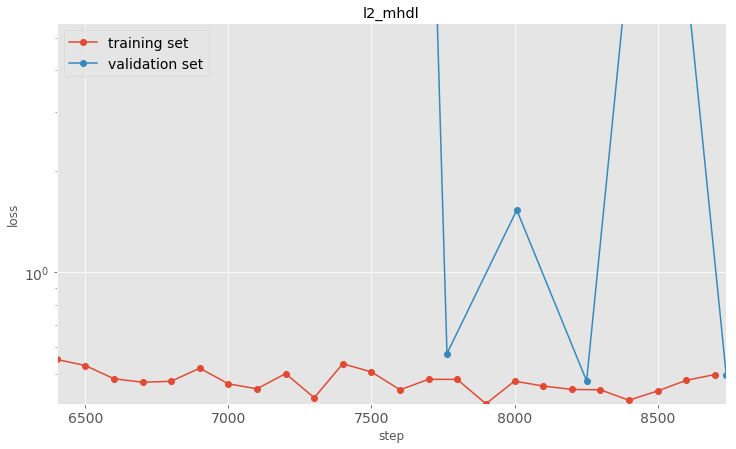

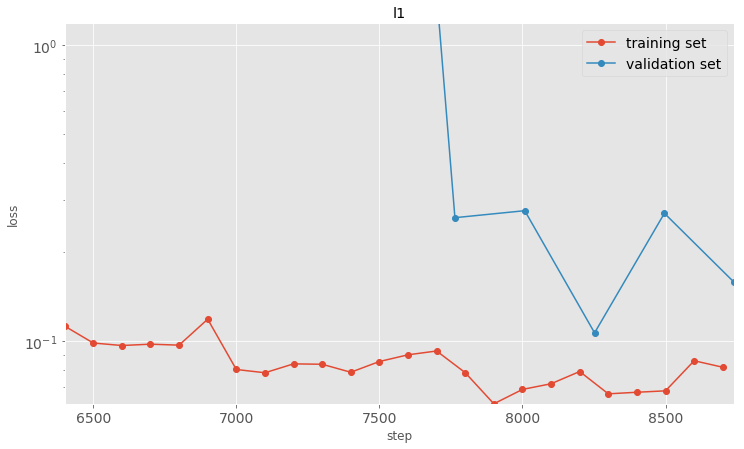

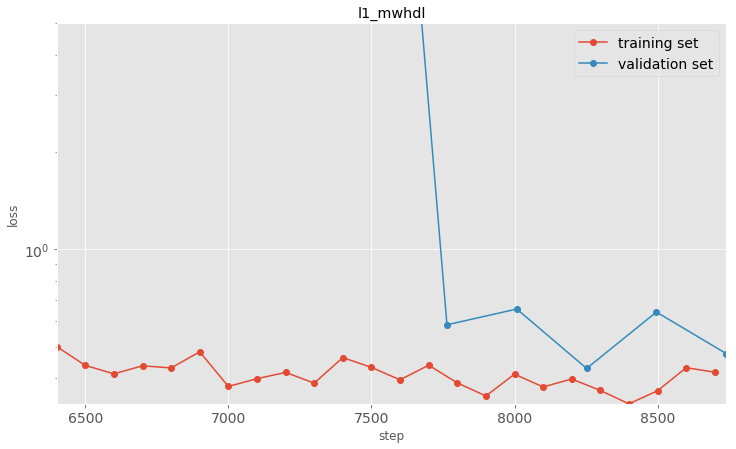

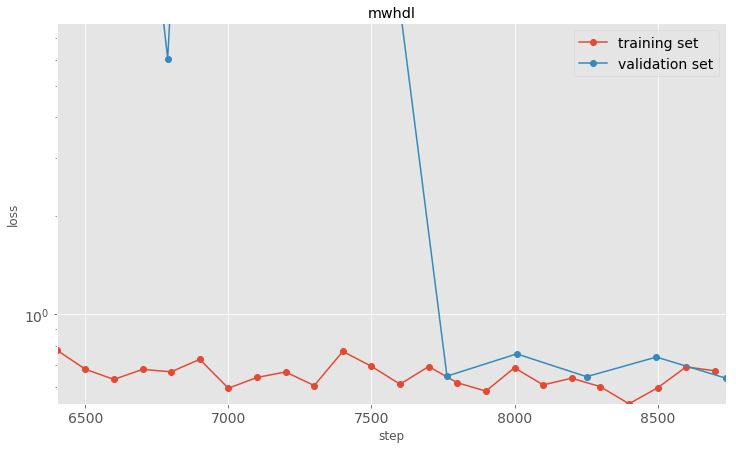

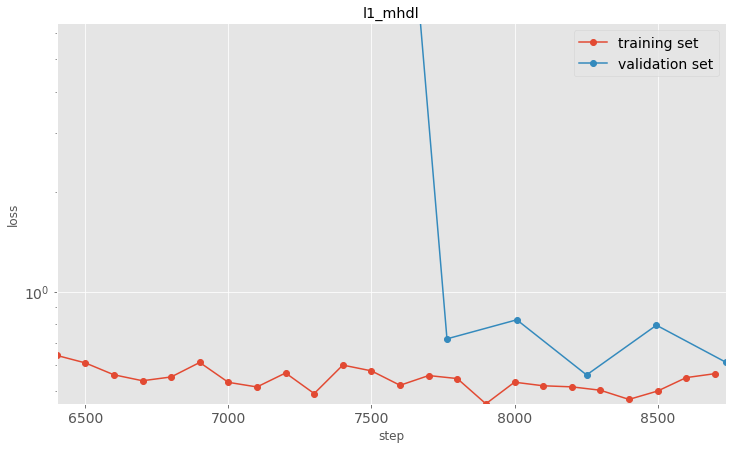

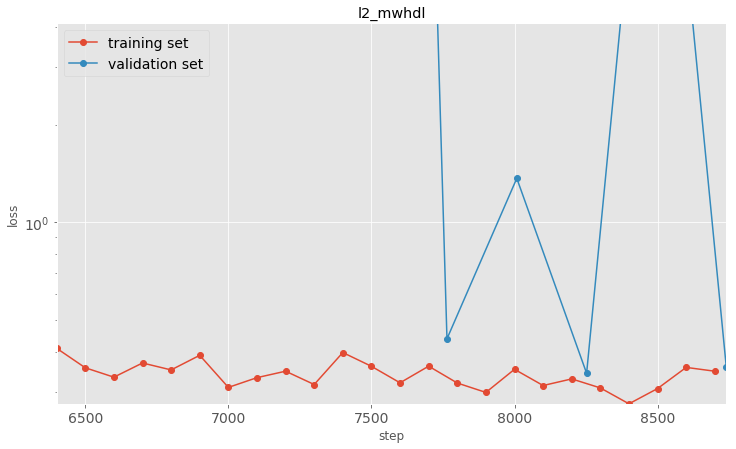

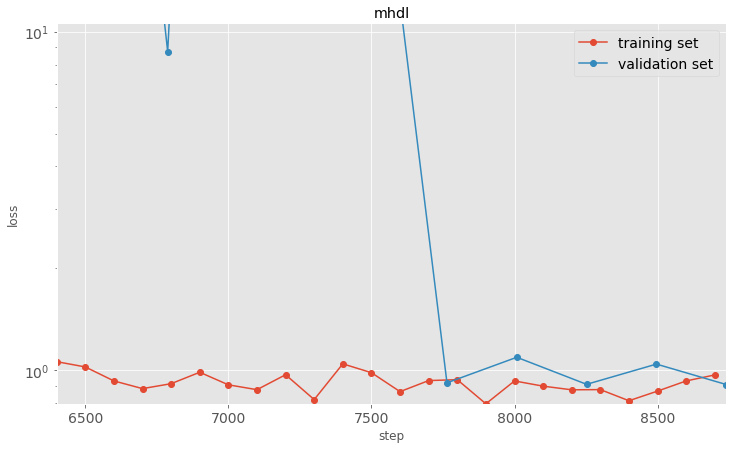

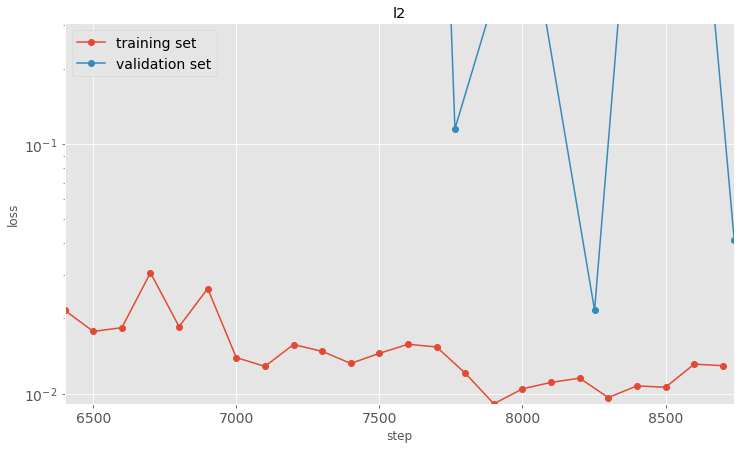

In [7]:
plot_all_loss_pairs(dfs_train=dfs_train_resnet_v1_50_deconv_decoder_iiw, 
                    dfs_valid=dfs_valid_resnet_v1_50_deconv_decoder_iiw, 
                    logy=True, ylim_scale=10)

### lambda = 1.0 (mhdl)        

In [14]:
lst = get_all_loss_model_data(data_dir=logs_data_path_iiw + 'slim_resnet_v1_50_deconv_decoder/l1_10mhdl',
                              exclude_sub_dirs=['2'])
dfs_train_resnet_v1_50_deconv_decoder_iiw, dfs_valid_resnet_v1_50_deconv_decoder_iiw = lst

['1']


/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:830: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)


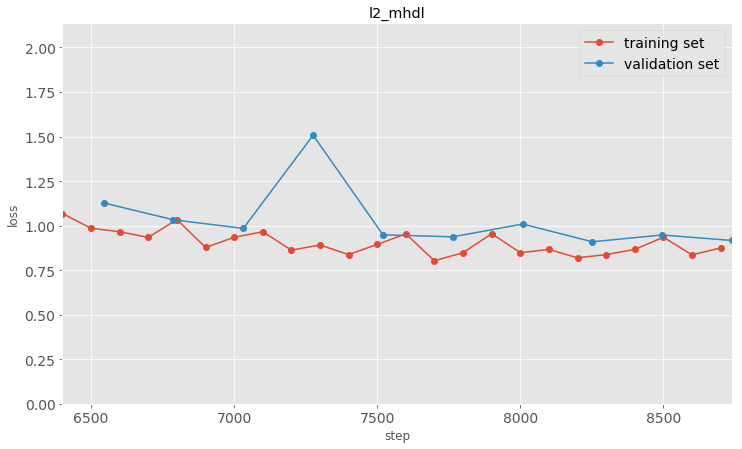

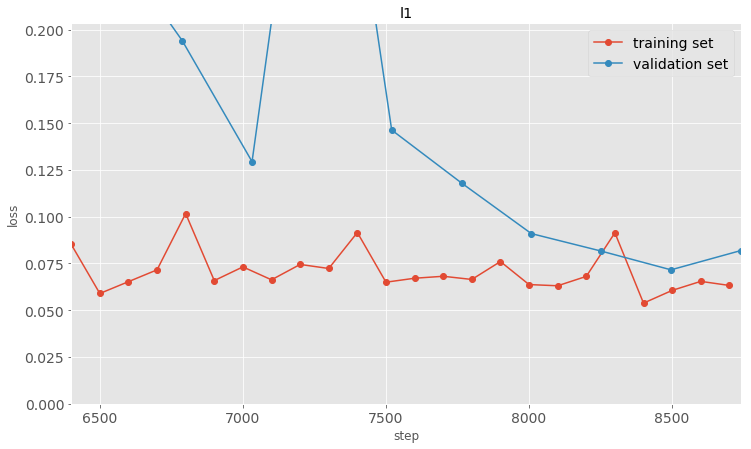

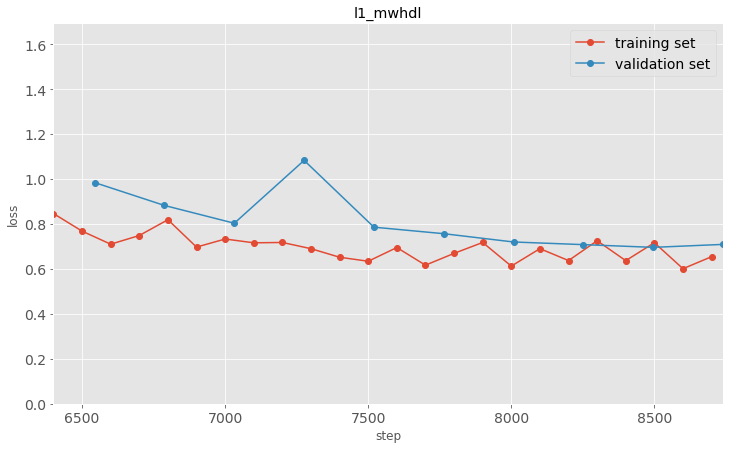

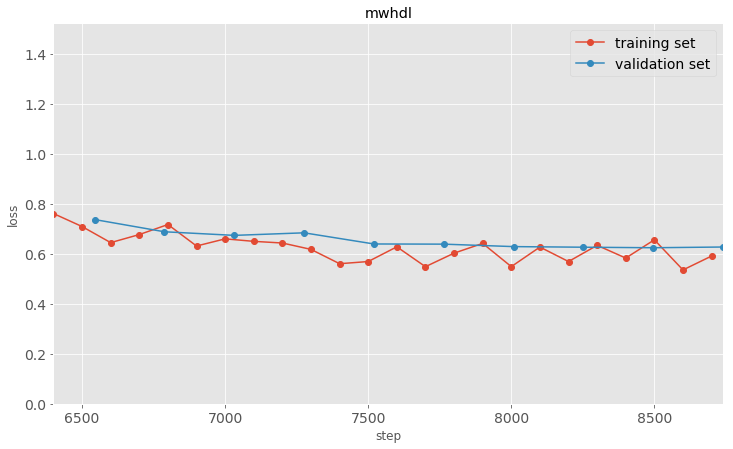

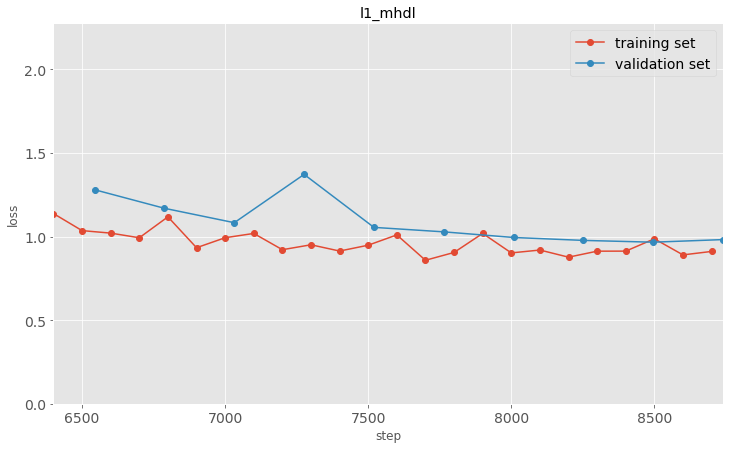

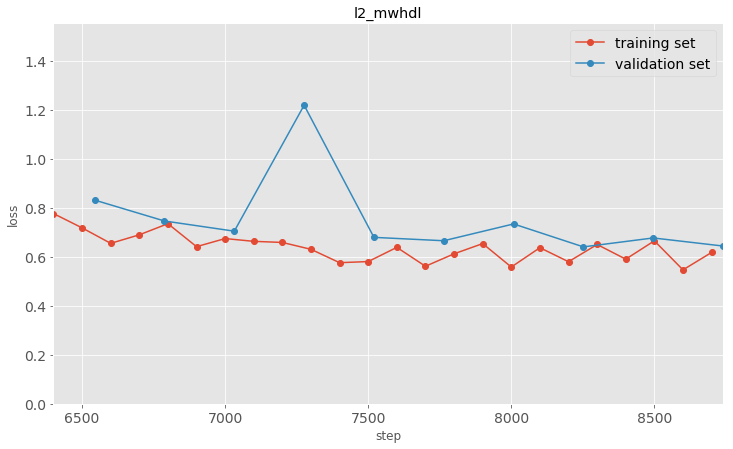

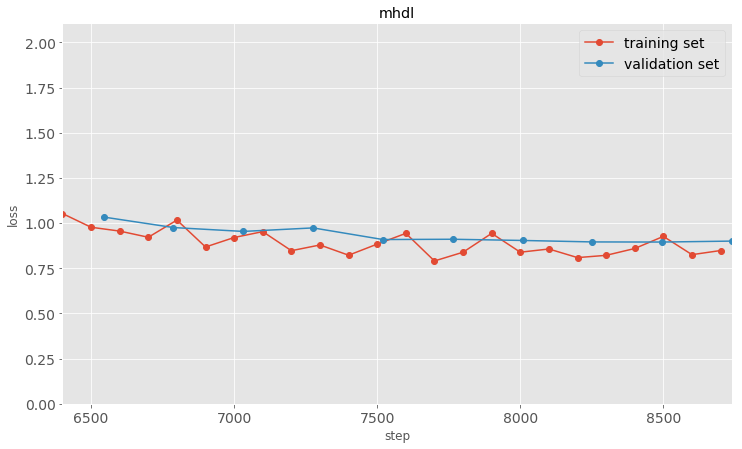

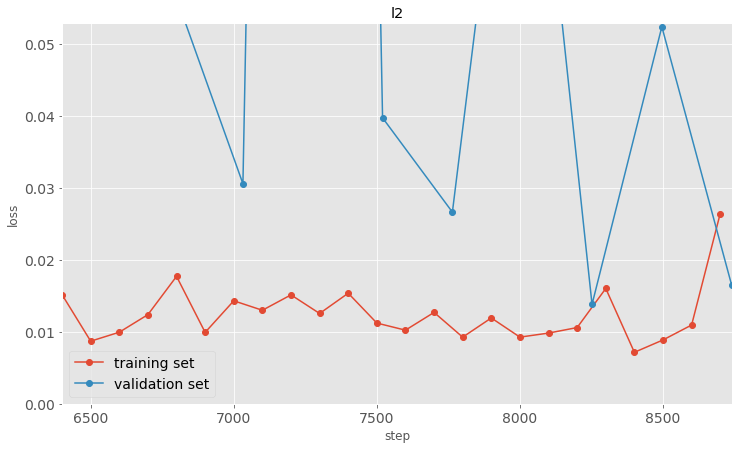

In [15]:
plot_all_loss_pairs(dfs_train=dfs_train_resnet_v1_50_deconv_decoder_iiw, 
                    dfs_valid=dfs_valid_resnet_v1_50_deconv_decoder_iiw, 
                    logy=False, ylim_scale=2)

## vgg-16 narihira2015:

### lambda = 1.0 (mhdl)

In [17]:
lst = get_all_loss_model_data(data_dir=logs_data_path_iiw + 'slim_vgg16_narihira2015/l1_10mhdl',
                              exclude_sub_dirs=['2'])
dfs_train_vgg16_narihira2015_iiw, dfs_valid_vgg16_narihira2015_iiw = lst

['1']


/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:830: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)


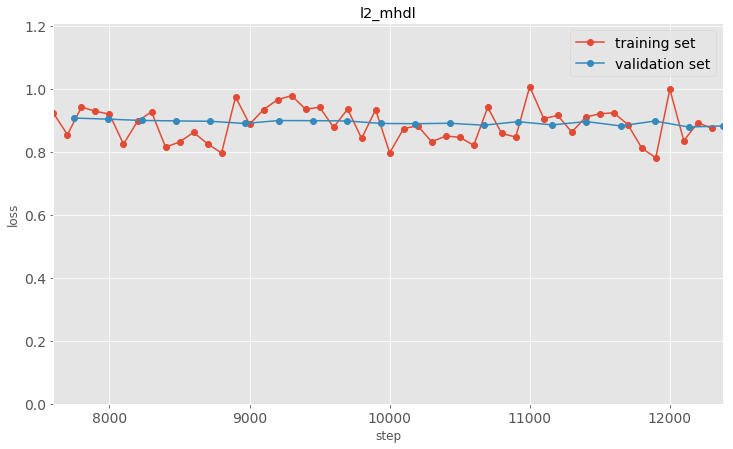

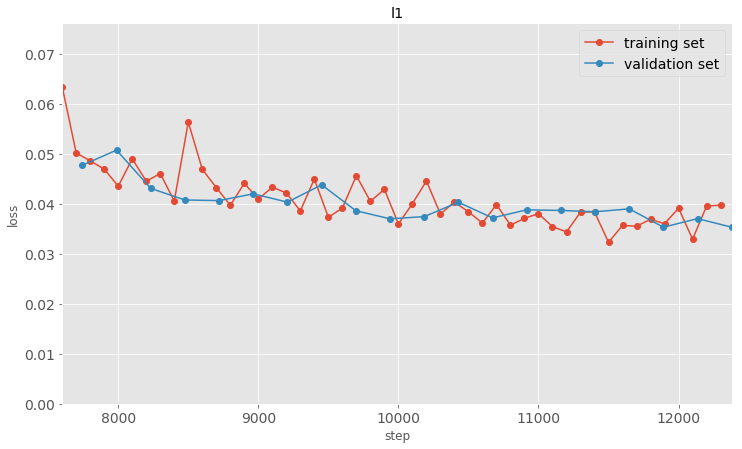

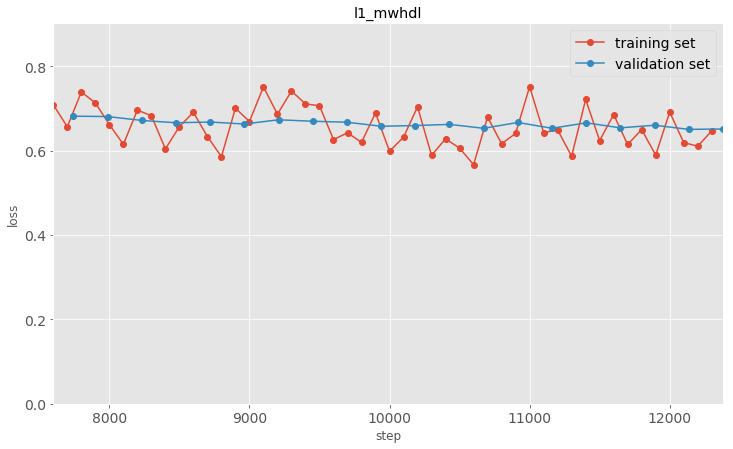

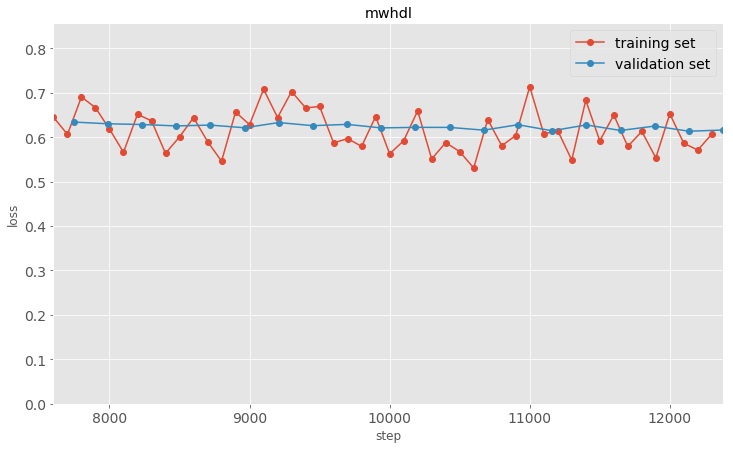

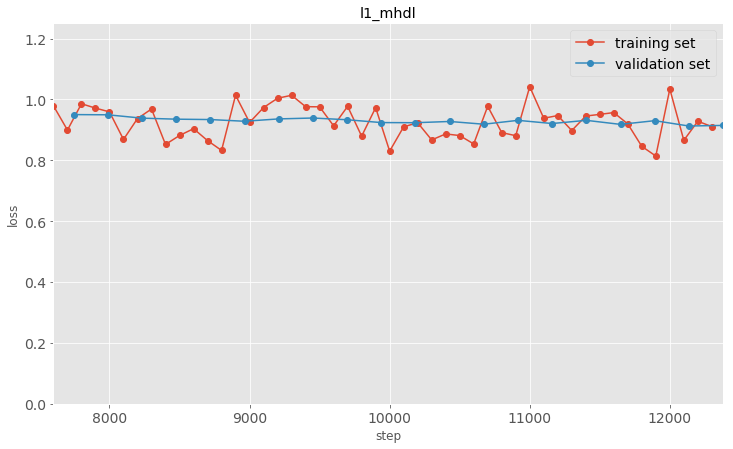

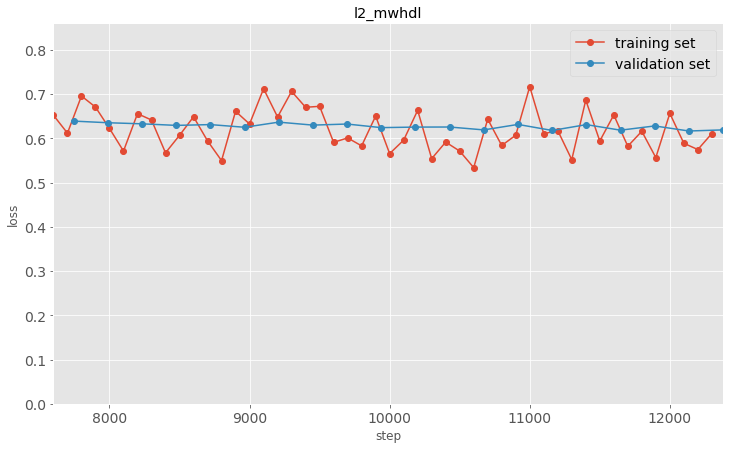

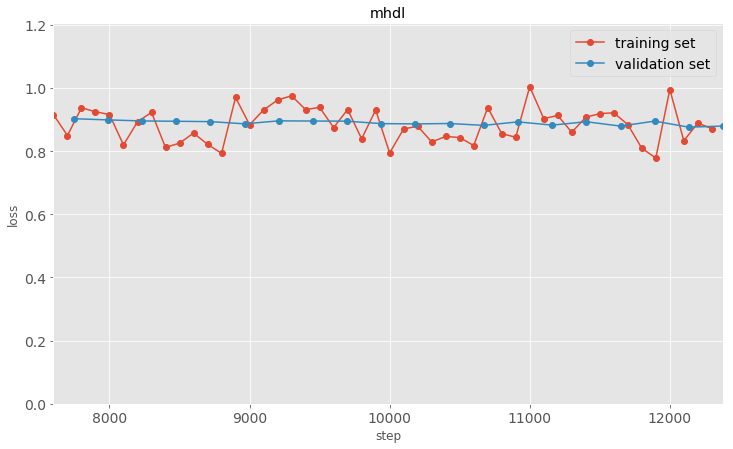

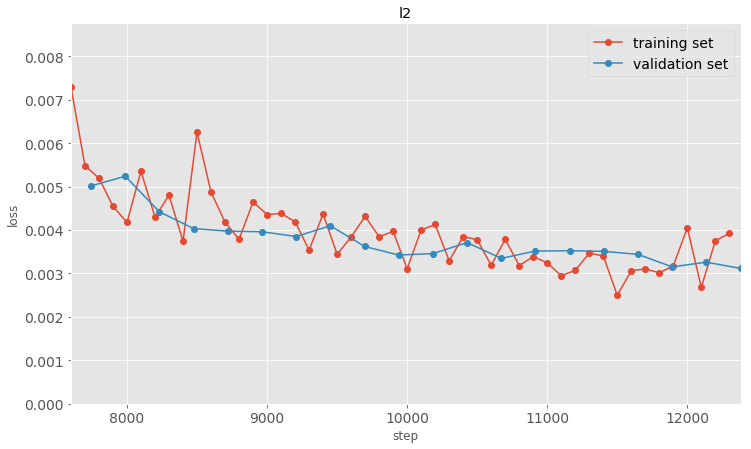

In [18]:
plot_all_loss_pairs(dfs_train=dfs_train_vgg16_narihira2015_iiw, 
                    dfs_valid=dfs_valid_vgg16_narihira2015_iiw, 
                    logy=False, ylim_scale=1.2)